### Secuencia de comandos para visualizar datos sísmicos en perspectiva 3D y 2D.

In [1]:
from m8r import view

#### Lectura de datos SEGY

Para leer archivos en formatos SEGY se requiere llamar el programa **sfsegyread**. Para más información ver: http://www.ahay.org/RSF/sfsegyread.html.

Con el programa **sfintbin** se ordenan las trazas sísmicas para darle la estructura 3D. Para más información ver: http://www.ahay.org/RSF/sfintbin.html.

La estructura del flujo es **Flow(*salida, entrada, proceso*)**

In [2]:
%%file lectura.scons

entrada = 'seismic.sgy'
Flow('seudo3d', entrada, 'segyread tfile=tfile.rsf bfile=bfile hfile=hfile verb=y endian=y')
Flow('sismica', 'seudo3d', 'intbin inv=n head=tfile.rsf xk=xline yk=iline | put label3=In-line label2=Cross-line')

Overwriting lectura.scons


#### Visualización de datos SEGY
Para visualizar los datos SEGY se requiere la función **sfgrey3**. Para más información leer: http://www.ahay.org/RSF/sfgrey3.html.

Para configurar los colores, ver: http://reproducibility.org/rsflog/index.php?/archives/14-Color-schemes.html

In [3]:
%%file imagenrdbu.scons

Plot('sismica1', 'sismica', '''byte gainpanel=all | grey3 frame1=400 frame2=100 
                                frame3=100 title="Perspectiva 3D Color RdBu" flat=n color=e''')
Plot('sismica2', 'sismica', '''byte gainpanel=all | grey3 frame1=400 frame2=100 
                                 frame3=100 title="Perspectiva 2D Color RdBu" flat=y color=e''' )
Result('fig1', 'sismica1 sismica2', 'SideBySideAniso')

Overwriting imagenrdbu.scons


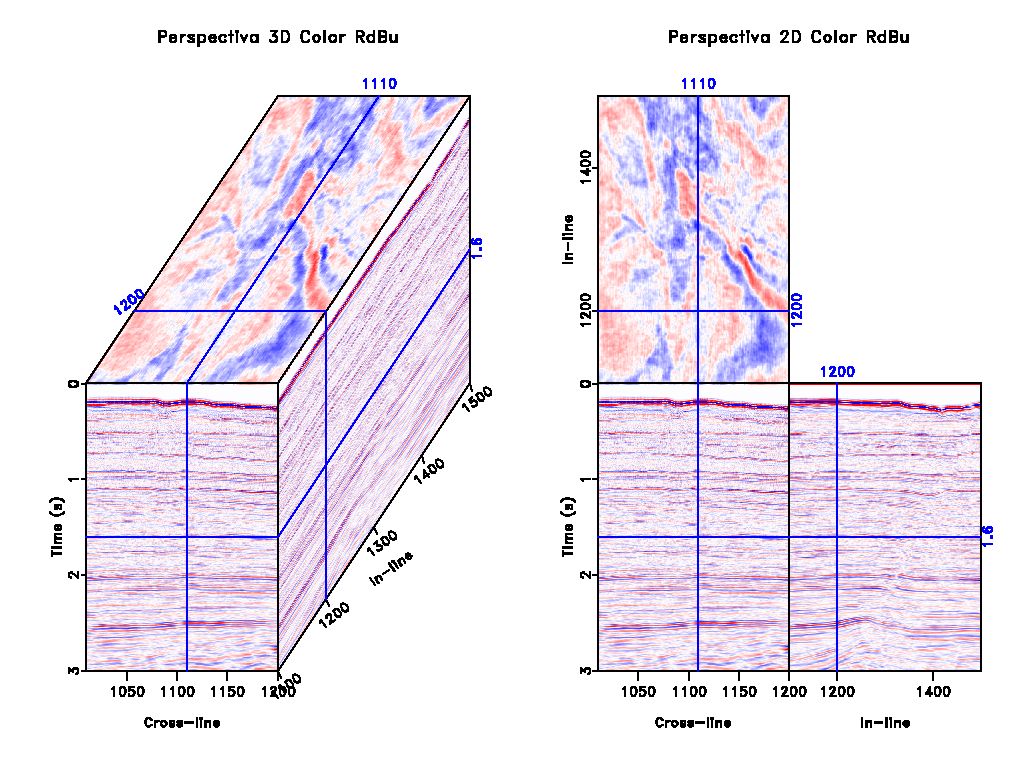

In [4]:
view('fig1')

In [5]:
%%file imagengreys.scons

Plot('sismica3', 'sismica', '''byte gainpanel=all | grey3 frame1=400 frame2=100 
                                frame3=100 title="Perspectiva 3D Color grises" flat=n color=i''')
Plot('sismica4', 'sismica', '''byte gainpanel=all | grey3 frame1=400 frame2=100 frame3=100
                point1=0.7 point2=0.5 point3=0.7 title="Perspectiva 2D Color grises" flat=y color=i''' )
Result('fig2', 'sismica3 sismica4', 'SideBySideAniso')

Overwriting imagengreys.scons


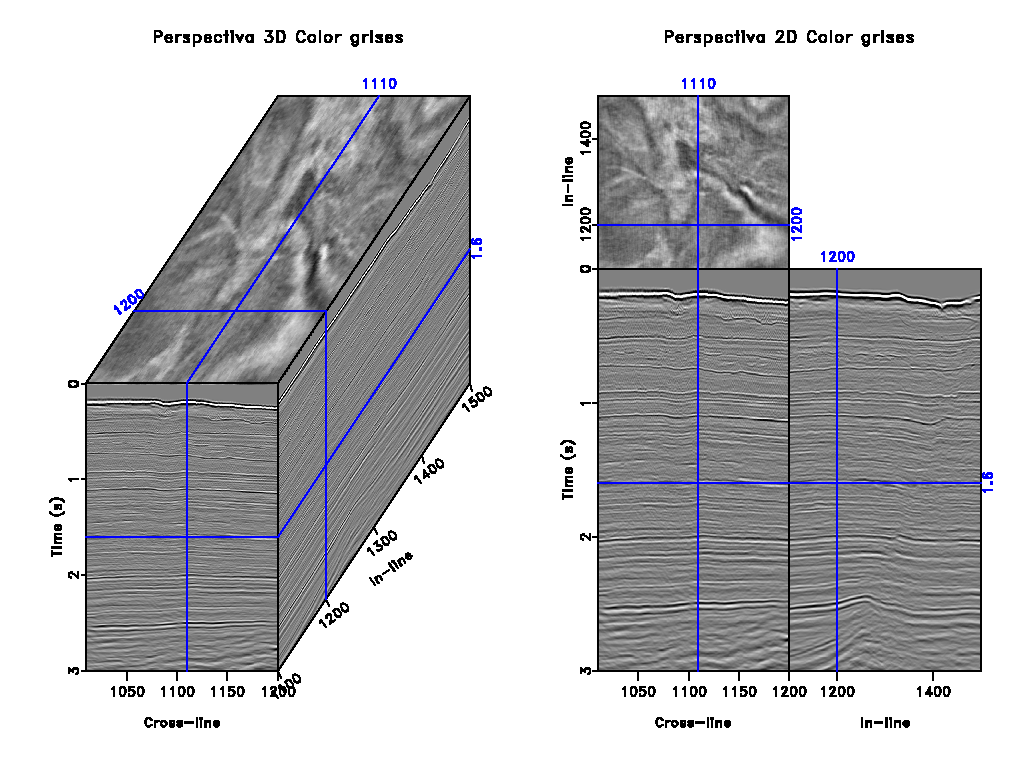

In [6]:
view('fig2')

#### Script _SConstruct_

from rsf.proj import *

entrada = 'seismic.sgy'

Flow('seudo3d', entrada, 'segyread tfile=tfile.rsf bfile=bfile hfile=hfile verb=y endian=y')

Flow('sismica', 'seudo3d', 'intbin inv=n head=tfile.rsf xk=xline yk=iline | put label3=In-line label2=Cross-line')

Plot('sismica1', 'sismica', '''byte gainpanel=all | grey3 frame1=400 frame2=100 
                                frame3=100 title="Perspectiva 3D Color RdBu" flat=n color=e''')
                                
Plot('sismica2', 'sismica', '''byte gainpanel=all | grey3 frame1=400 frame2=100 
                                 frame3=100 title="Perspectiva 2D Color RdBu" flat=y color=e''' )
                                 
Result('fig1', 'sismica1 sismica2', 'SideBySideAniso')

Plot('sismica3', 'sismica', '''byte gainpanel=all | grey3 frame1=400 frame2=100 
                                frame3=100 title="Perspectiva 3D Color grises" flat=n color=i''')
                                
Plot('sismica4', 'sismica', '''byte gainpanel=all | grey3 frame1=400 frame2=100 frame3=100
                point1=0.7 point2=0.5 point3=0.7 title="Perspectiva 2D Color grises" flat=y color=i''' )
                
Result('fig2', 'sismica3 sismica4', 'SideBySideAniso')

End()

In [7]:
#!scons -cQ